In [ ]:
# Code prints the answer, and doesn't use the template code


import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)


# Train the model
model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs=15, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

<ipython-input-50-a2004c398287>:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


Epoch 1/15
468/468 [==============================] - 71s 149ms/step - loss: 0.6034 - accuracy: 0.8059 - val_loss: 0.0687 - val_accuracy: 0.9773
Epoch 2/15
468/468 [==============================] - 63s 135ms/step - loss: 0.2357 - accuracy: 0.9273 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 3/15
468/468 [==============================] - 60s 129ms/step - loss: 0.1763 - accuracy: 0.9470 - val_loss: 0.0395 - val_accuracy: 0.9865
Epoch 4/15
468/468 [==============================] - 62s 131ms/step - loss: 0.1446 - accuracy: 0.9564 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 5/15
468/468 [==============================] - 61s 130ms/step - loss: 0.1322 - accuracy: 0.9607 - val_loss: 0.0250 - val_accuracy: 0.9911
Epoch 6/15
468/468 [==============================] - 62s 132ms/step - loss: 0.1175 - accuracy: 0.9653 - val_loss: 0.0218 - val_accuracy: 0.9931
Epoch 7/15
468/468 [==============================] - 60s 128ms/step - loss: 0.1077 - accuracy: 0.9680 - val_loss: 0.0222 - val_ac

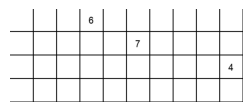

(204, 510, 3)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


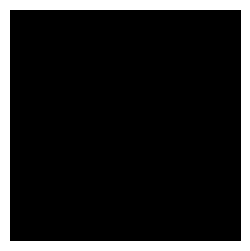

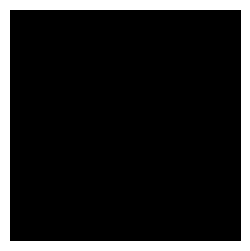

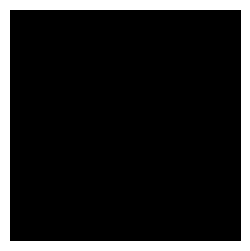

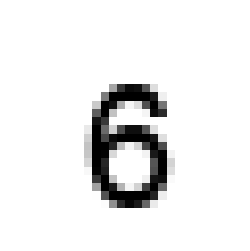

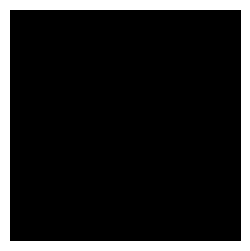

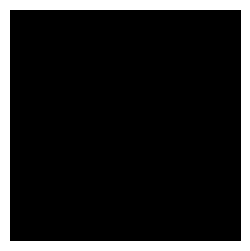

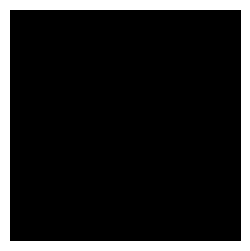

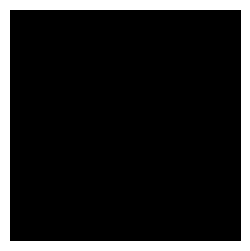

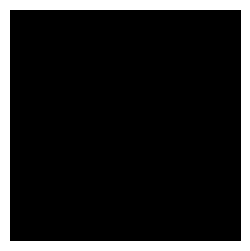

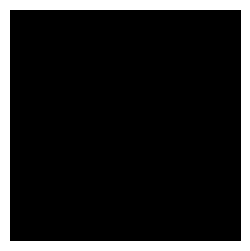

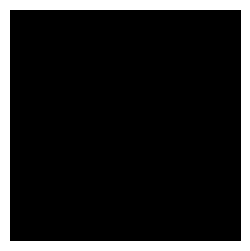

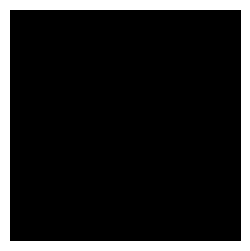

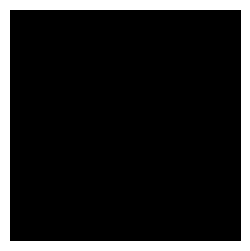

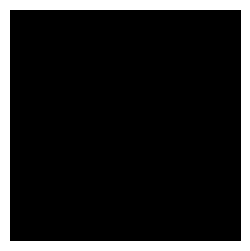

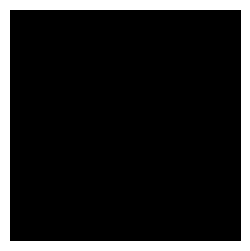

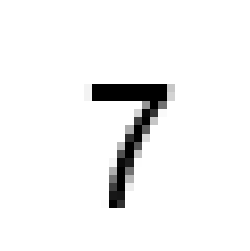

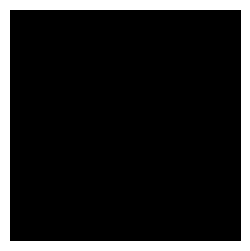

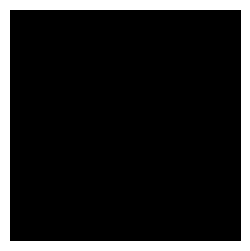

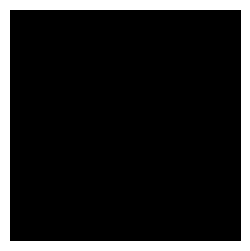

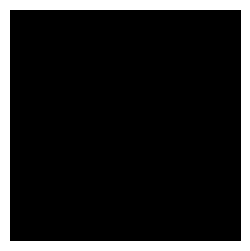

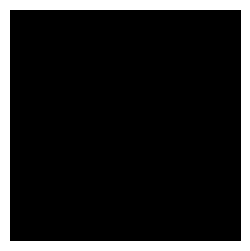

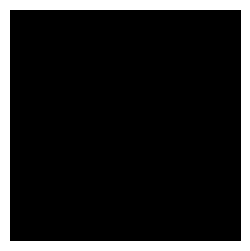

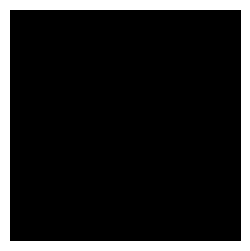

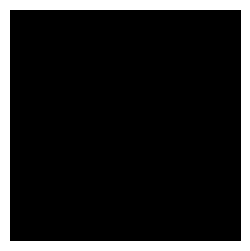

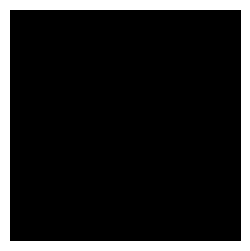

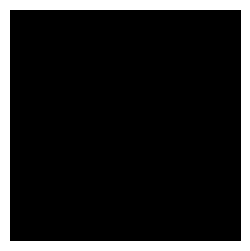

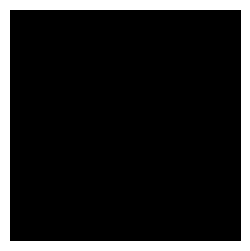

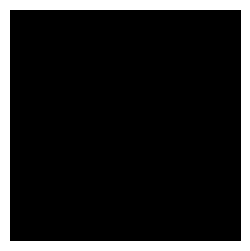

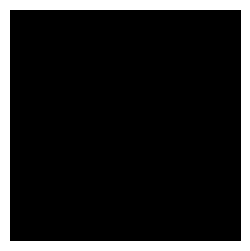

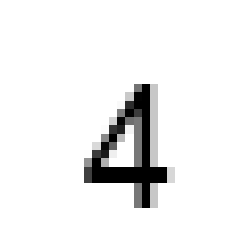

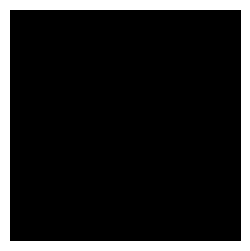

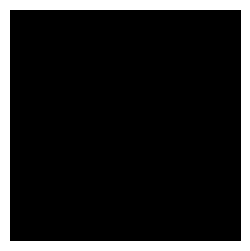

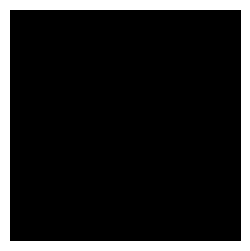

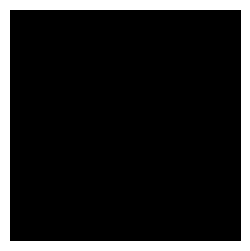

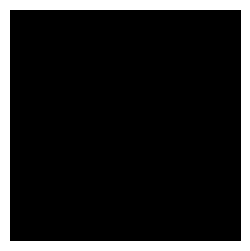

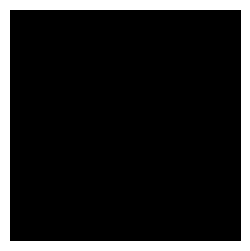

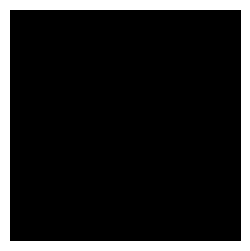

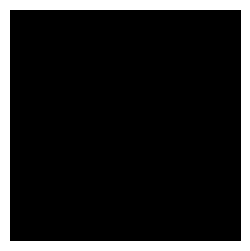

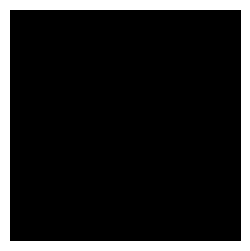

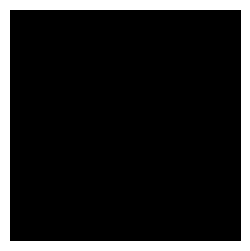

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio

# Load the grid image
image_path = '5.png'
grid_image = iio.imread(image_path)
grid_image = grid_image[1:, 1:]

plt.figure(figsize=(3, 3))
plt.imshow(grid_image, cmap='gray')
plt.axis('off')
plt.show()

print(grid_image.shape)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Check if the image is loaded successfully
if grid_image is not None:
    # Define box dimensions
    box_size = 49  # Size of each box in pixels
    line_width = 2  # Width of the separating lines in pixels

    # Calculate the number of rows and columns of boxes
    num_rows = int(grid_image.shape[0] // (box_size + line_width))
    num_cols = grid_image.shape[1] // (box_size + line_width)

    # Extract individual boxes from the grid image
    box_pixels = []
    for i in range(num_rows):
        for j in range(num_cols):
            box_start_x = j * (box_size + line_width)
            box_start_y = i * (box_size + line_width)
            box = grid_image[box_start_y + 10:(box_start_y + box_size) - 11, box_start_x + 10:(box_start_x + box_size) - 11]
            gray = rgb2gray(box)
            gray = np.reshape(gray, (28, 28, 1))

            print(gray.shape)
            # Resize box to a square of side 49 pixels

            box_pixels.append(gray)


    # Display each box one after the other
    for i, box in enumerate(box_pixels):

      plt.figure(figsize=(3, 3))
      plt.imshow(box_pixels[i], cmap='gray')
      plt.axis('off')
      plt.show()
else:
    print(f"Failed to load image from path: {image_path}")

In [ ]:
from PIL import Image

def predict(normalized_image):
    # Check the shape of the preprocessed image

    # Reshape the image to match the model's input shape
    normalized_image = normalized_image.reshape(1, 28, 28, 1)
    normalized_image = np.rint(normalized_image)
    normalized_image = 255 - normalized_image
    normalized_image = normalized_image/255

    # Make predictions
    prediction_probabilities = model.predict(normalized_image)
    predicted_digit = np.argmax(prediction_probabilities)



    # Get the probability of the predicted digit
    predicted_probability = np.max(prediction_probabilities)

    return predicted_digit

def not_black(im):
    eps = 2

    black_row = []
    for i in range(im.shape[0]):
        flag=0
        for j in range(im.shape[1]):
            if im[i, j] == 255:
                flag += 1
        if im.shape[1] - flag < eps:
            black_row.append(i)
    if len(black_row) > im.shape[0] - eps:
        return 0
    return 1


ans = []
for i, box in enumerate(box_pixels):
    box = np.rint(box)
    if(not_black(box)):
        prediction = predict(box)
        ans.append((i+1, prediction))

print(ans)

1/1 [==============================] - 0s 33ms/step
[(4, 3), (16, 7), (30, 6)]


In [ ]:
def taskOne(input_image):
    """
    input:  path to the input image
    output: return list of tuples

    """
    #START CODE
    # print(input_image)
    grid_image = iio.imread(input_image)
    grid_image = grid_image[1:, 1:]

    plt.figure(figsize=(3, 3))
    plt.imshow(grid_image, cmap='gray')
    plt.axis('off')
    plt.show()


    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

    # Check if the image is loaded successfully
    if grid_image is not None:
        # Define box dimensions
        box_size = 49  # Size of each box in pixels
        line_width = 2  # Width of the separating lines in pixels

        # Calculate the number of rows and columns of boxes
        num_rows = int(grid_image.shape[0] // (box_size + line_width))
        num_cols = grid_image.shape[1] // (box_size + line_width)

        # Extract individual boxes from the grid image
        box_pixels = []
        for i in range(num_rows):
            for j in range(num_cols):
                box_start_x = j * (box_size + line_width)
                box_start_y = i * (box_size + line_width)
                box = grid_image[box_start_y + 10:(box_start_y + box_size) - 11, box_start_x + 10:(box_start_x + box_size) - 11]
                gray = rgb2gray(box)
                gray = np.reshape(gray, (28, 28, 1))

                # Resize box to a square of side 49 pixels

                box_pixels.append(gray)


    # Display each box one after the other
    # for i, box in enumerate(box_pixels):

    #   plt.figure(figsize=(3, 3))
    #   plt.imshow(box_pixels[i], cmap='gray')
    #   plt.axis('off')
    #   plt.show()
    # else:
    #   print(f"Failed to load image from path: {input_image}")

    ans = []
    for i, box in enumerate(box_pixels):
        box = np.rint(box)
        if(not_black(box)):
            prediction = predict(box)
            ans.append((i+1, prediction))

    return ans

  #END CODE HERE

Output for Test1:


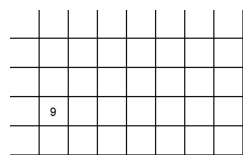

1/1 [==============================] - 0s 44ms/step
[(26, 9)]
Output for Test2:


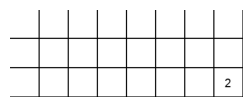

1/1 [==============================] - 0s 39ms/step
[(24, 2)]
Output for Test3:


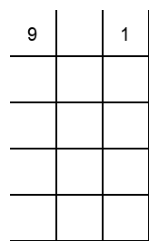

1/1 [==============================] - 0s 36ms/step
[(1, 9), (3, 1)]
Output for Test4:


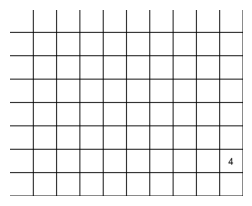

1/1 [==============================] - 0s 49ms/step
[(70, 4)]
Output for Test5:


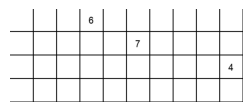

1/1 [==============================] - 0s 22ms/step
[(4, 8), (16, 7), (30, 4)]
Output for Test6:


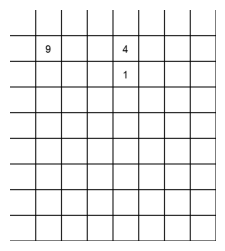

1/1 [==============================] - 0s 22ms/step
[(10, 9), (13, 4), (21, 1)]
Output for Test7:


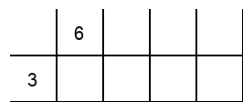

1/1 [==============================] - 0s 21ms/step
[(2, 8), (6, 3)]
Output for Test8:


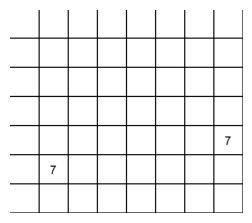

1/1 [==============================] - 0s 24ms/step
[(40, 7), (42, 7)]
Output for Test9:


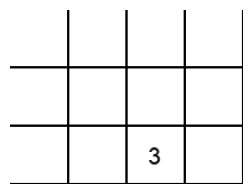

1/1 [==============================] - 0s 24ms/step
[(11, 3)]
Output for Test10:


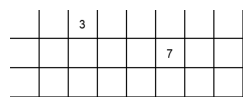

1/1 [==============================] - 0s 24ms/step
[(3, 3), (14, 7)]


In [ ]:
for i in range(1, 11):
  print("Output for Test" + str(i) + ":")
  print(taskOne(str(i)+'.png'))